## COMP 361/651   Data Analytics Techniques in Python
### Assignment 11 

10 points possible <br>
Solutions should be one or two lines of Python code unless it is otherwise stated. (The last problem is worth 3 points and has youo do something original.) Have each cell produce an output that can be inspected by the grader. Sometimes this will require an extra line at the end with just the variable whose value is the result.

Import NumPy and pandas. From pandas, import __`Series`__ and __`DataFrame`__. And define __`NA`__ as follows.

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
NA = np.NaN

__1 (0.7 pt.)__ Construct a DataFrame assigned to df.  The contents are as follows. 
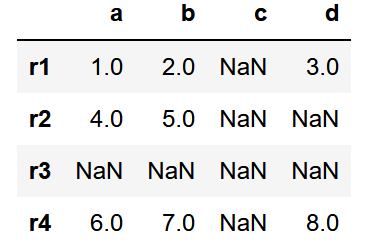

In [2]:
# Your code goes here.
df = pd.DataFrame([[1.0,2.0,np.nan, 3.0], [4.0,5.0,np.nan, np.nan],[np.nan, np.nan, np.nan, np.nan], [6.0,7.0,np.nan,8.0]], index= ['r1','r2','r3','r4'],columns=['a','b','c','d'])
df

,a,b,c,d
r1,1.0,2.0,NaN,3.0
r2,4.0,5.0,NaN,NaN
r3,NaN,NaN,NaN,NaN
r4,6.0,7.0,NaN,8.0


__2 (0.5 pt.)__ Drop all rows of __`df`__ that are missing all data. The result is
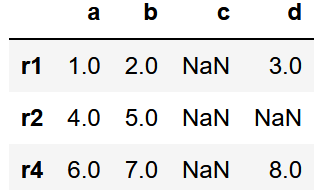

In [3]:
# Your code goes here.
df.dropna(how='all')

,a,b,c,d
r1,1.0,2.0,NaN,3.0
r2,4.0,5.0,NaN,NaN
r4,6.0,7.0,NaN,8.0


__3 ( 0.5 pt)__ Rather than drop positions where the data is missing, we’ll now fill them in. Provide 11 to fill missing data in the __`a`__ column, 12 missing data in the __`b`__ column, 13 for missing data in the __`c`__ column, and 14 for missing data in the __`d`__ column. The result is as follows.
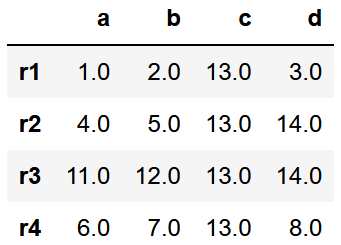

In [4]:
# Your code goes here.
df. fillna({'a':11.0, 'b':12.0, 'c':13.0, 'd':14.0})

,a,b,c,d
r1,1.0,2.0,13.0,3.0
r2,4.0,5.0,13.0,14.0
r3,11.0,12.0,13.0,14.0
r4,6.0,7.0,13.0,8.0


__4 (0.8 pt.)__ Construct a DataFrame assigned to __`df1`__.  The contents are as follows. (I used four statements to construct __`df1`__.)
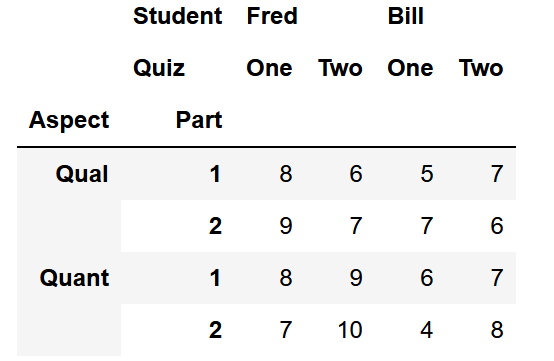

In [6]:
# Your code goes here.
columns= pd.MultiIndex.from_tuples([('Fred','One'),('Fred','Two'),('Bill','One'),('Bill','Two')])
index = pd.MultiIndex.from_product([['Qual','Quant'],[1,2]], names=['Aspect','Part'])
data = [[8,6,5,7],[9,7,7,6],[8,9,6,7],[7,10,4,8]]
df1 = pd.DataFrame(data, index=index, columns=columns)
df1.columns.names=['Student','Quiz']
df1

Student     Fred     Bill    
Quiz         One Two  One Two
Aspect Part                  
Qual   1       8   6    5   7
       2       9   7    7   6
Quant  1       8   9    6   7
       2       7  10    4   8

__5 (0.5 pt.)__ Select just the two columns with data on Fred. The following is the result.
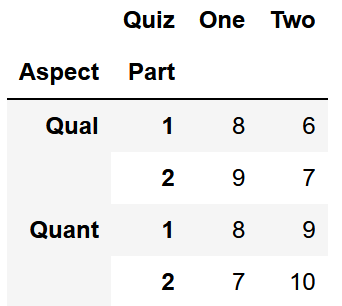

In [7]:
# Your code goes here.
df1.iloc[:, :2]

Student     Fred    
Quiz         One Two
Aspect Part         
Qual   1       8   6
       2       9   7
Quant  1       8   9
       2       7  10

__6 (0.5 pt.)__ Select just the row for __`Aspect Qual`__ and __`Part 2`__. The result is as follows. 
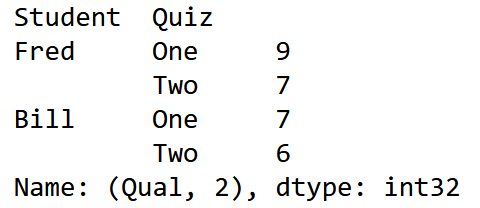

In [8]:
# Your code goes here.
df1.iloc[1, :]

Student  Quiz
Fred     One     9
         Two     7
Bill     One     7
         Two     6
Name: (Qual, 2), dtype: int64

__7 (0.7 pt.)__ Select just the information on the __`Qual`__ aspect for Fred. The result is 
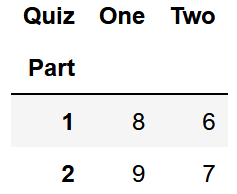

In [9]:
# Your code goes here.
df1.iloc[:2,:2]

Student     Fred    
Quiz         One Two
Aspect Part         
Qual   1       8   6
       2       9   7

__8 (0.7 pt.)__ Find the mean across the two quizzes for the students. Use __`groupby()`__. (There will be a mean value for each student for both parts of both aspects, four means in all for each student). The following is the result.
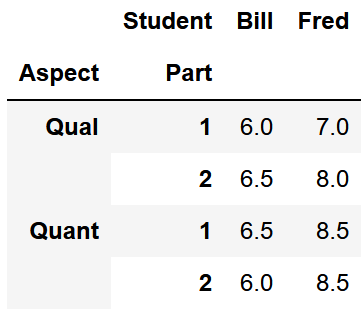

In [12]:
# Your code goes here.
df1.groupby('Student', axis=1).mean()

Student      Bill  Fred
Aspect Part            
Qual   1      6.0   7.0
       2      6.5   8.0
Quant  1      6.5   8.5
       2      6.0   8.5

__9 (0.7 pt.)__ Swap the __`Aspect`__ and __`Part`__ indexes and sort on the __`Part`__ index. The result is 
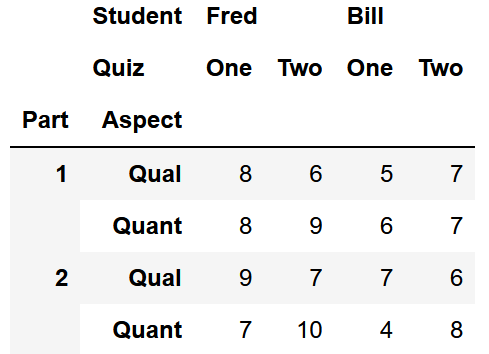

In [13]:
# Your code goes here.
df1.swaplevel('Aspect','Part')

Student     Fred     Bill    
Quiz         One Two  One Two
Part Aspect                  
1    Qual      8   6    5   7
2    Qual      9   7    7   6
1    Quant     8   9    6   7
2    Quant     7  10    4   8

__10 (0.7 pt.)__ Construct a DataFrame assigned to __`df2`__.  The contents are as follows.
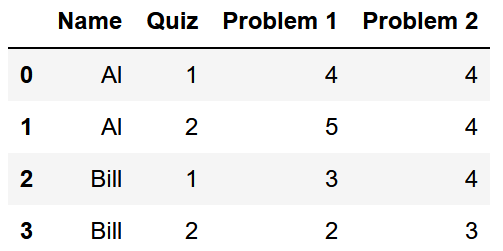

In [14]:
# Your code goes here.
df2 = pd.DataFrame({'Name': ['Al','Al','Bill','Bill'], 'Quiz':[1,2,1,2], 'Problem 1': [4,5,3,2], 'Problem 2': [4,4,4,3]})
df2

,Name,Quiz,Problem 1,Problem 2
0,Al,1,4,4
1,Al,2,5,4
2,Bill,1,3,4
3,Bill,2,2,3


__11 (0.7 pt.)__ Produce from __`df2`__ a DataFrame that has the columns __`Name`__ and __`Quiz`__ as a hierarchical index. The result is 
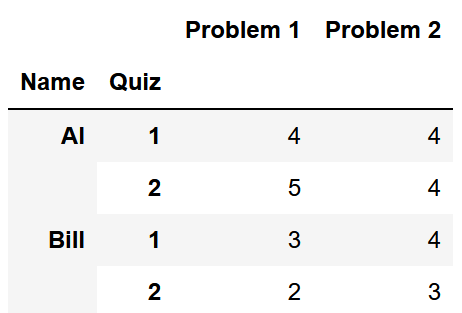

In [16]:
# Your code goes here
df2.set_index(['Name','Quiz'])

Problem 1  Problem 2
Name Quiz                      
Al   1             4          4
     2             5          4
Bill 1             3          4
     2             2          3

__12 (1.0 pt.)__ You are provided a CSV data file named __`'BNC2_sample.csv'`__, which contains daily information on cryptocurrencies (such as Bitcoin). Read the dataset into a pandas DataFrame __`df`__. To read it easily, put it in the same directory as your Jupyter note books. The DataFrame should have column labels as shown below. Default on the row index. Display the first five lines, as shown below. By default, __`df.head()`__ returns a DataFrame with just the first five lines of DataFrame __`df`__. (There will be 96 total lines in __`df`__.)<br>
The __`Code`__ column abbreviates the name of the cryptocurrency (so, e.g., __`'GWA_BTC'`__ relates to the global-weighted average of Bitcoin). An asset's time-weighted average price (__TWAP__) is the measure of an asset's average price over a predetermined period of time (here a day). The volume-weighted average price (__VWAP__) is a trading benchmark that gives the average price a security has traded at throughout the day, based on both volume and price.
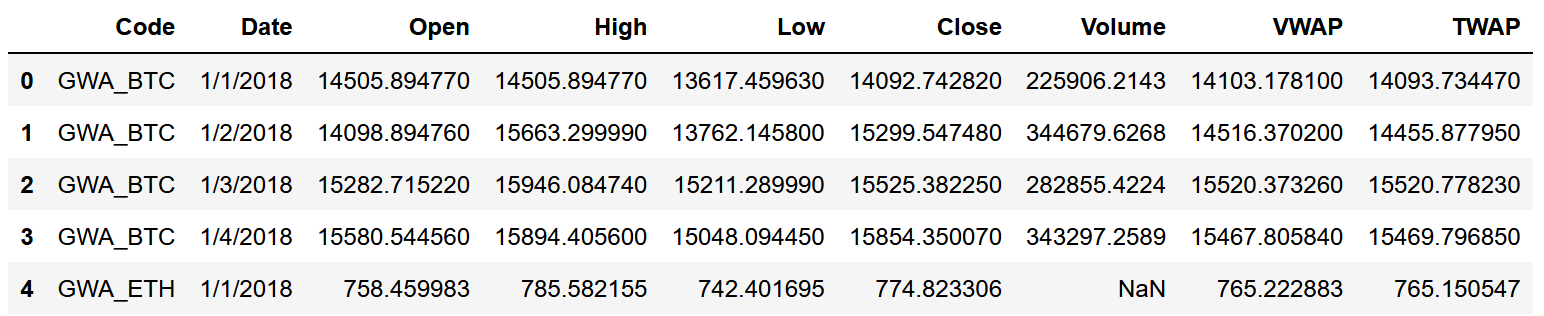

In [18]:
# Your code goes here.
df = pd.read_csv('BNC2_sample.csv')
df.columns=['Code','Date','Open','High', 'Low','Close','Volume','VWAP','TWAP']
df.head()

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP
0,GWA_BTC,1/2/2018,14098.894760,15663.299990,13762.145800,15299.547480,3.446796e+05,14516.370200,14455.877950
1,GWA_BTC,1/3/2018,15282.715220,15946.084740,15211.289990,15525.382250,2.828554e+05,15520.373260,15520.778230
2,GWA_BTC,1/4/2018,15580.544560,15894.405600,15048.094450,15854.350070,3.432973e+05,15467.805840,15469.796850
3,GWA_ETH,1/1/2018,758.459983,785.582155,742.401695,774.823306,NaN,765.222883,765.150547
4,GWA_ETH,1/2/2018,775.834809,NaN,775.834809,886.150676,4.567658e+06,881.407819,878.564411


__13 (2.0 pts.)__ The rest of this assignment is to do something interesting (in your notebook) with this data. This could be extracting values, finding statistics, producing a pivot table, or much else. Just three or four things (perhaps even two if they show sufficient skill).<br>
<br>
_There should follow a sequence of Mardown and code cells._

**1** Add a column in the dataframe named 'Profit/Loss' where it conatins the differnce between the open and close price 

In [36]:
# Your code goes here.
df['Profit/Loss'] = df['Open'] - df['Close']
df.head()

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP,Profit/Loss
0,GWA_BTC,1/2/2018,14098.894760,15663.299990,13762.145800,15299.547480,3.446796e+05,14516.370200,14455.877950,-1200.652720
1,GWA_BTC,1/3/2018,15282.715220,15946.084740,15211.289990,15525.382250,2.828554e+05,15520.373260,15520.778230,-242.667030
2,GWA_BTC,1/4/2018,15580.544560,15894.405600,15048.094450,15854.350070,3.432973e+05,15467.805840,15469.796850,-273.805510
3,GWA_ETH,1/1/2018,758.459983,785.582155,742.401695,774.823306,NaN,765.222883,765.150547,-16.363323
4,GWA_ETH,1/2/2018,775.834809,NaN,775.834809,886.150676,4.567658e+06,881.407819,878.564411,-110.315867


**2** Create a pivot table with the high and low values of the given cryptocurrencies as the index on their respective dates 

In [39]:
# Your code goes here.
pivot = pd.pivot_table(df, values = ['High','Low'] , index = ['Code'], columns = 'Date')
pivot.head()

High                                                   Low  \
Date       1/1/2018      1/2/2018      1/3/2018      1/4/2018    1/1/2018   
Code                                                                        
GWA_BTC         NaN  15663.299990  15946.084740  15894.405600         NaN   
GWA_ETH  785.582155           NaN    976.046990   1041.855149  742.401695   
GWA_LTC  235.843280    262.902490    259.865954    252.425448  221.054330   
GWA_XLM    0.527223      0.592103      0.920124      0.930699    0.356887   
GWA_XRP    2.354321      2.447539      3.204555      3.751908    2.090116   

                                                   
Date         1/2/2018      1/3/2018      1/4/2018  
Code                                               
GWA_BTC  13762.145800  15211.289990  15048.094450  
GWA_ETH    775.834809           NaN    935.002271  
GWA_LTC    228.075223    246.246239    233.792410  
GWA_XLM      0.469513      0.559812      0.668266  
GWA_XRP      2.192695      2.396428      2.997786

**3** Create a seperate dataframe named df_BTC where it conatins only information will the cryptocurrency BTC

In [41]:
# Your code goes here.
df_BTC = df[df['Code']== 'GWA_BTC'] 
df_BTC.head()

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP,Profit/Loss
0,GWA_BTC,1/2/2018,14098.89476,15663.29999,13762.14580,15299.54748,344679.6268,14516.37020,14455.87795,-1200.65272
1,GWA_BTC,1/3/2018,15282.71522,15946.08474,15211.28999,15525.38225,282855.4224,15520.37326,15520.77823,-242.66703
2,GWA_BTC,1/4/2018,15580.54456,15894.40560,15048.09445,15854.35007,343297.2589,15467.80584,15469.79685,-273.80551


**4** Find the highest value from the 'High' column in the df_BTC dataframe

In [42]:
# Your code goes here.
df_BTC['High'].max()

15946.08474

**5** Create a seperate dataframe named df_ETH where it conatins only information will the cryptocurrency ETH

In [47]:
# Your code goes here.
df_ETH =df[df['Code']== 'GWA_ETH']
df_ETH.head()

,Code,Date,Open,High,Low,Close,Volume,VWAP,TWAP,Profit/Loss
3,GWA_ETH,1/1/2018,758.459983,785.582155,742.401695,774.823306,NaN,765.222883,765.150547,-16.363323
4,GWA_ETH,1/2/2018,775.834809,NaN,775.834809,886.150676,4567657.993,881.407819,878.564411,-110.315867
5,GWA_ETH,1/3/2018,887.265440,976.046990,NaN,NaN,3365800.638,904.111568,904.963789,NaN
6,GWA_ETH,1/4/2018,965.006032,1041.855149,935.002271,981.067891,4125657.997,NaN,979.216456,-16.061859


**6** Find the lowest value from the 'Low' column in the df_ETH dataframe

In [45]:
# Your code goes here.
df_ETH['Low'].min()

742.4016948